In [1]:
import june_gloom
#june_gloom.wug_data_concat()
june_gloom.init()
june_gloom.weather_data_features()
from june_gloom import (combined_weather_df, pt_june_gloom_df, fog_days_df, rain_days_df)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians

In [3]:
print(combined_weather_df['year'].value_counts())

2000    366
1999    365
1997    365
2002    365
1998    365
2001    362
Name: year, dtype: int64


In [4]:
print(fog_days_df.info())
print('\n\n')
print(rain_days_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 1 to 11
Data columns (total 6 columns):
year             103 non-null int64
meanwdird        103 non-null int64
meantempm        103 non-null float64
meandewptm       103 non-null float64
meanpressurem    103 non-null float64
fog              103 non-null int64
dtypes: float64(3), int64(3)
memory usage: 5.6 KB
None



<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 1 to 12
Data columns (total 5 columns):
year             176 non-null int64
meanwdird        176 non-null int64
meantempm        172 non-null float64
meandewptm       172 non-null float64
meanpressurem    176 non-null float64
dtypes: float64(3), int64(2)
memory usage: 8.2 KB
None


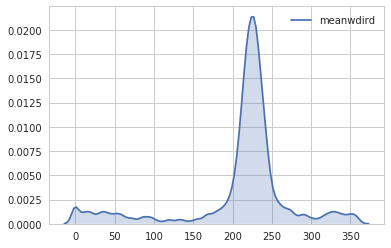

In [5]:
sns.set(style='whitegrid')
sns.kdeplot(combined_weather_df['meanwdird'], shade=True)

Text(0.5,1.05,'Mean Wind Bearing vs Mean Windspeed')

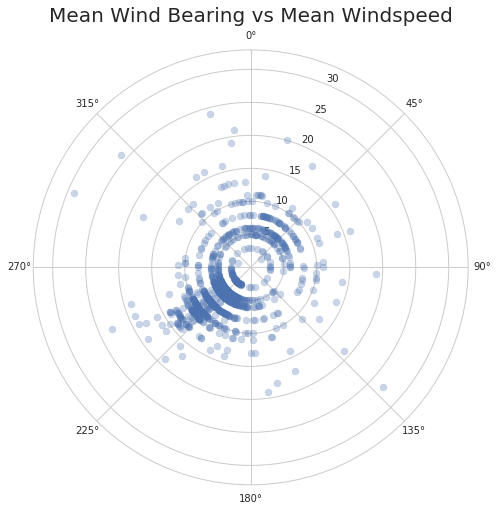

In [6]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df['meanwdird'].values], 
           y=combined_weather_df['meanwindspdm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Bearing vs Mean Windspeed', fontsize=20)

Text(0.5,1.05,'Mean Wind Bearing vs Mean Windspeed: Foggy condtions')

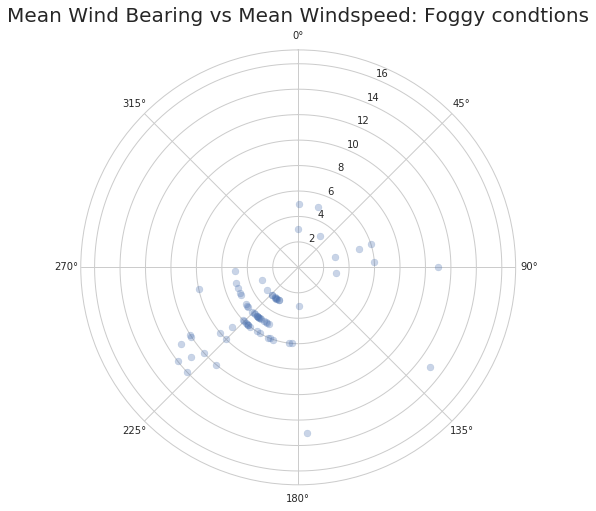

In [7]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df[combined_weather_df['fog']==1]['meanwdird'].values], 
           y=combined_weather_df[combined_weather_df['fog']==1]['meanwindspdm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Bearing vs Mean Windspeed: Foggy condtions', fontsize=20)

Text(0.5,1.05,'Mean Wind Bearing vs Mean Windspeed: Rainy condtions')

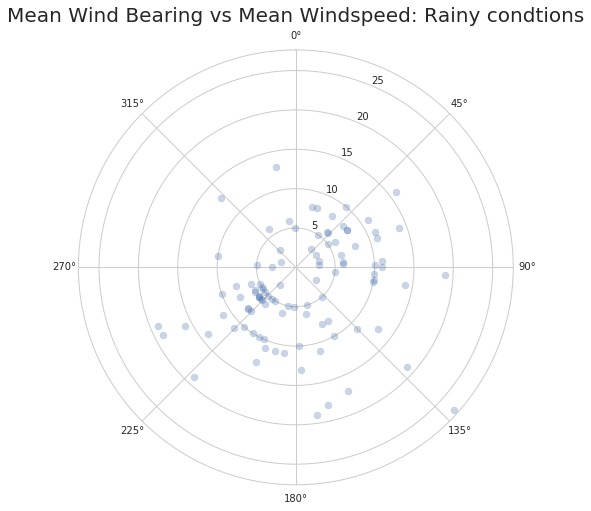

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df[combined_weather_df['rain']==1]['meanwdird'].values], 
           y=combined_weather_df[combined_weather_df['rain']==1]['meanwindspdm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Bearing vs Mean Windspeed: Rainy condtions', fontsize=20)

Text(0.5,1.05,'Mean Wind Dir vs Mean Dew Temp')

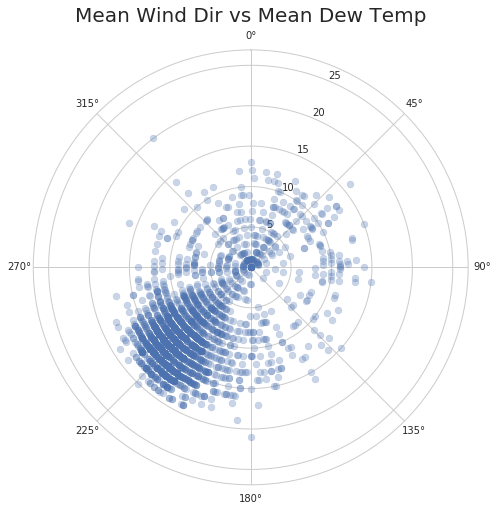

In [9]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df['meanwdird'].values], 
           y=combined_weather_df['meandewptm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Dir vs Mean Dew Temp', fontsize=20)

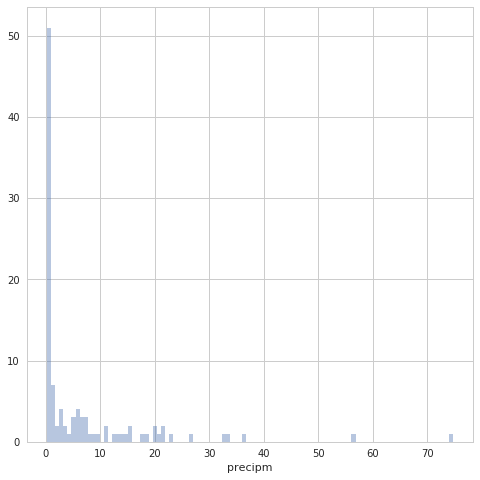

In [10]:
plt.figure(figsize=(8,8))
sns.distplot(combined_weather_df[combined_weather_df['precipm']!=0]['precipm'], 
             bins=100, kde=False)

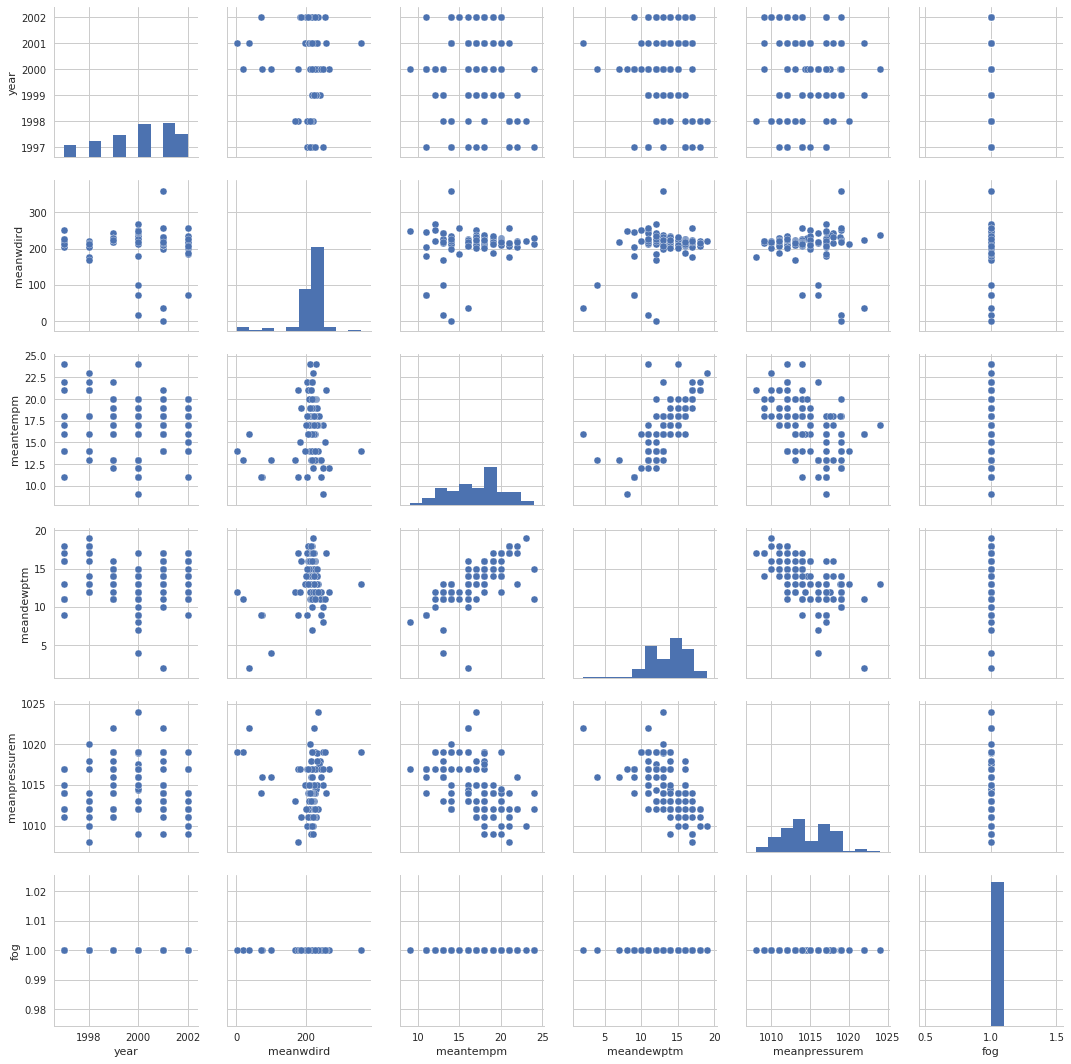

In [11]:
sns.set(style='whitegrid')

sns.pairplot(fog_days_df)

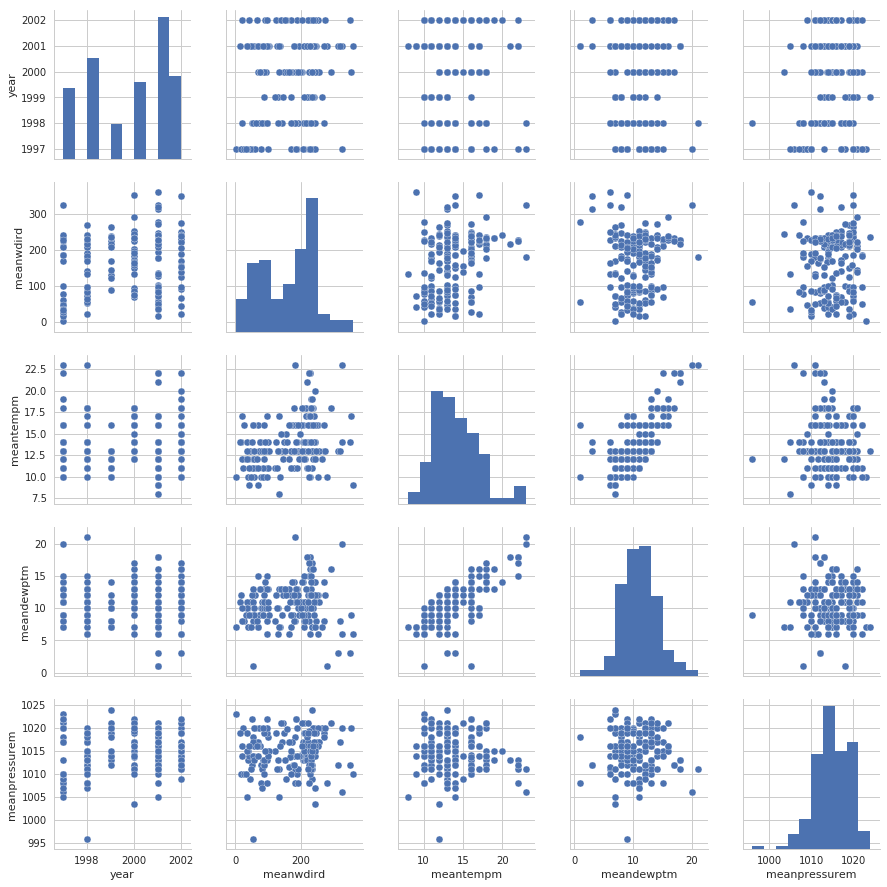

In [12]:
sns.set(style='whitegrid')

sns.pairplot(rain_days_df.dropna())

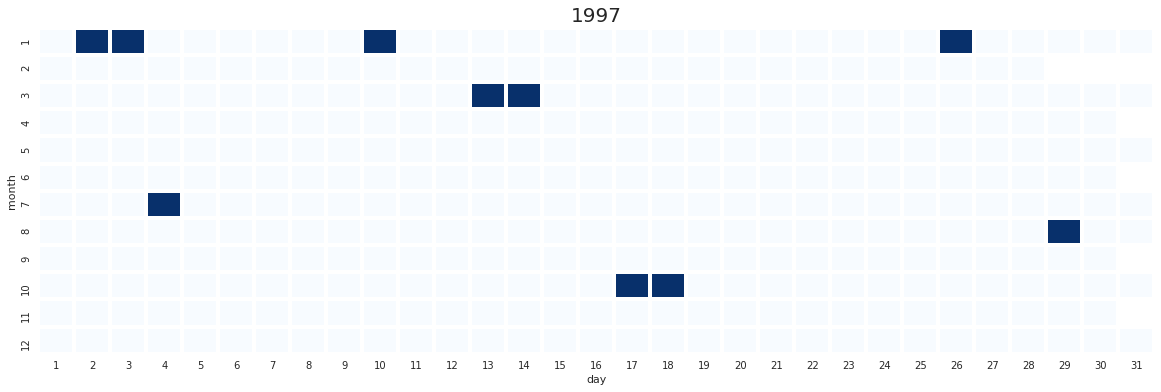

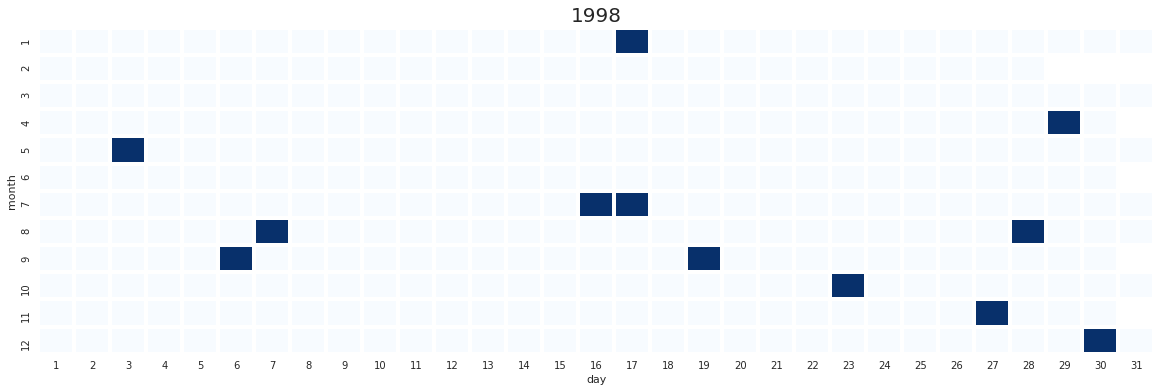

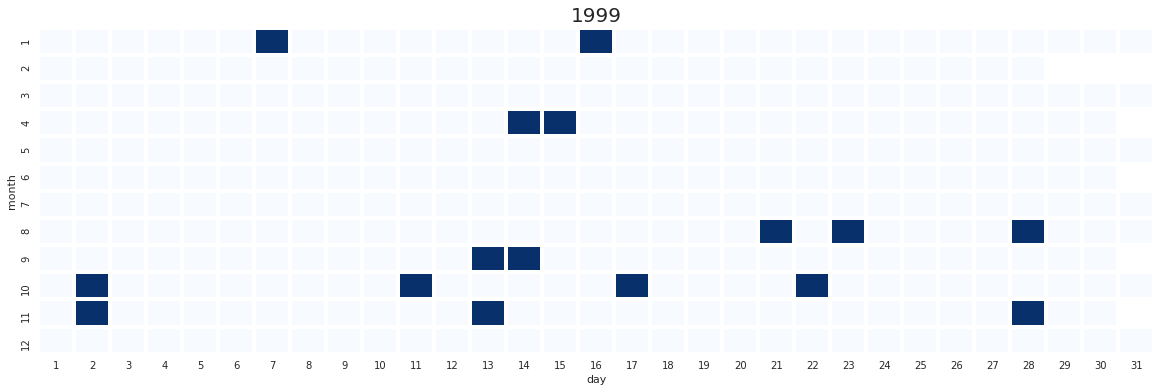

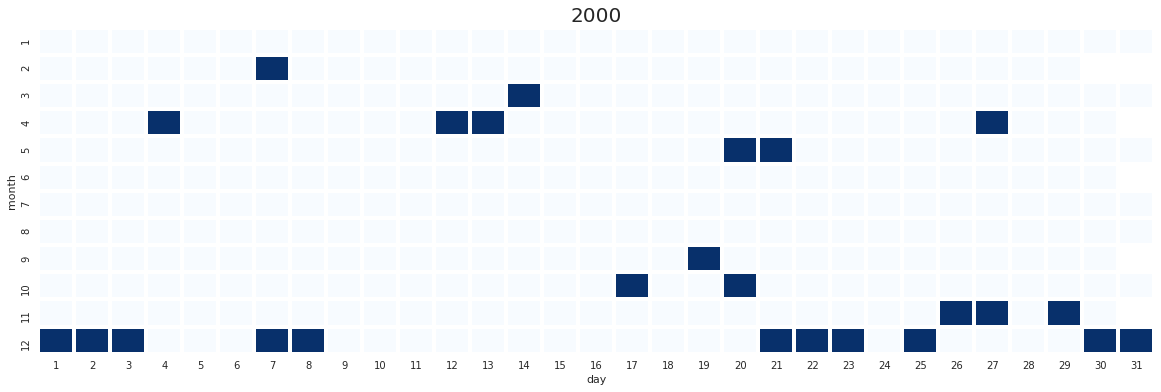

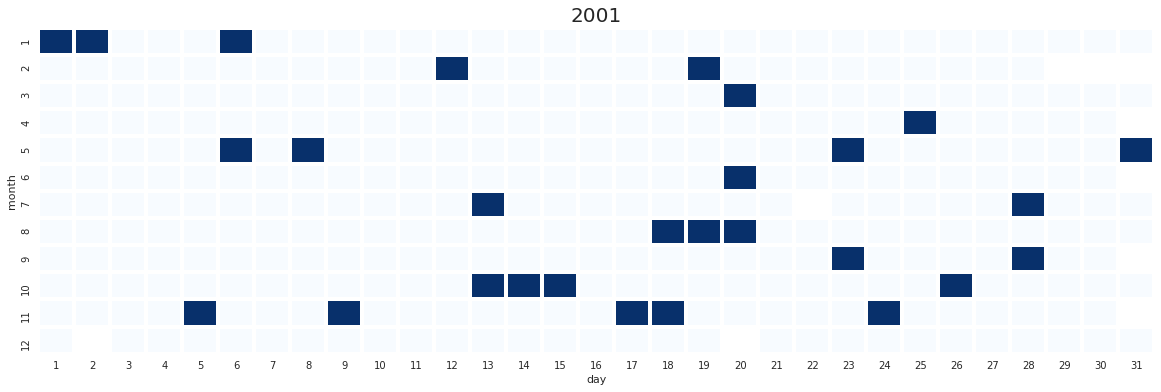

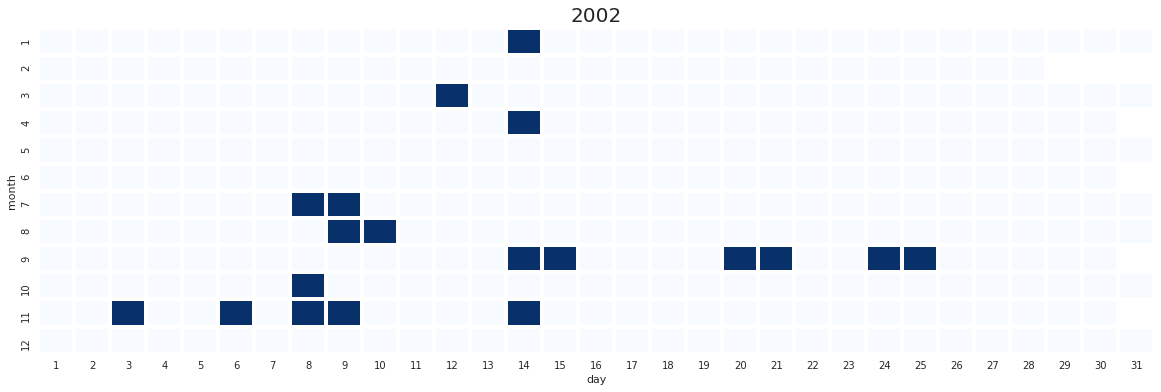

In [13]:
for x in range(1997,2003):
    sns.set(style='whitegrid')
    plt.figure(figsize=(20,6))
    
    sns.heatmap(pt_june_gloom_df.xs(x, level='year', axis=1), linewidth=3, 
                cmap='Blues', cbar=False)
  
    plt.title(x, fontsize=20)
    plt.show()

In [14]:
pt_temp_df = combined_weather_df.pivot_table(index='month', columns=['day', 'year'], 
                                                 values=['meantempm'])

In [15]:
pt_temp_df.xs(x, level='year', axis=1)

meantempm                                                        ...   \
day          1     2     3     4     5     6     7     8     9     10  ...    
month                                                                  ...    
1          13.0  13.0  13.0  12.0  14.0  14.0  16.0  14.0  14.0  12.0  ...    
2          11.0  11.0  12.0  13.0  12.0  12.0  10.0  13.0  17.0  17.0  ...    
3          16.0  14.0  14.0  16.0  13.0  13.0  14.0  13.0  14.0  14.0  ...    
4          13.0  12.0  13.0  13.0  13.0  14.0  14.0  15.0  13.0  14.0  ...    
5          13.0  13.0  14.0  14.0  16.0  16.0  16.0  16.0  14.0  14.0  ...    
6          17.0  17.0  17.0  16.0  18.0  18.0  19.0  19.0  18.0  18.0  ...    
7          19.0  18.0  18.0  18.0  19.0  19.0  18.0  18.0  20.0  20.0  ...    
8          19.0  19.0  19.0  18.0  19.0  19.0  18.0  19.0  19.0  18.0  ...    
9          26.0  24.0  22.0  22.0  22.0  22.0  18.0  18.0  19.0  21.0  ...    
10         16.0  16.0  17.0  18.0  18.0  19.0  21.0  19.0  18.0  17.0  ...    
11         14.0  13.0  14.0  16.0  14.0  15.0  14.0  14.0  16.0  17.0  ...    
12         13.0  14.0  14.0  13.0  16.0  14.0  15.0  14.0  14.0  13.0  ...    

                                                                   
day      22    23    24    25    26    27    28    29    30    31  
month                                                              
1      12.0  12.0  10.0  14.0  12.0  11.0   9.0   7.0  11.0   8.0  
2      23.0  15.0  14.0  14.0  18.0  18.0  14.0   NaN   NaN   NaN  
3      12.0  14.0  13.0  13.0  13.0  12.0  14.0  13.0  13.0  12.0  
4      16.0  17.0  14.0  15.0  14.0  13.0  13.0  14.0  14.0   NaN  
5      14.0  16.0  16.0  17.0  17.0  14.0  16.0  17.0  19.0  18.0  
6      18.0  18.0  19.0  18.0  18.0  18.0  18.0  19.0  19.0   NaN  
7      19.0  19.0  22.0  21.0  19.0  19.0  19.0  19.0  19.0  19.0  
8      19.0  19.0  18.0  18.0  19.0  18.0  20.0  19.0  19.0  20.0  
9      21.0  21.0  20.0  20.0  17.0  18.0  18.0  18.0  17.0   NaN  
10     17.0  14.0  16.0  16.0  14.0  16.0  14.0  16.0  16.0  15.0  
11     18.0  16.0  13.0  18.0  21.0  17.0  19.0  17.0  15.0   NaN  
12     14.0  12.0  10.0  11.0  12.0  13.0  13.0  11.0  12.0  11.0  

[12 rows x 31 columns]

In [16]:
combined_weather_df.head()

,date,fog,maxdewptm,maxhumidity,maxpressurem,maxtempm,meandewptm,meanpressurem,meantempm,meanwdird,...,mindewptm,minhumidity,minpressurem,mintempm,precipm,rain,year,month,day,dayofweek
0,1997-01-01,0,16.0,100.0,1022.0,20.0,14.0,1020.0,18.0,236,...,13.0,64.0,1019.0,15.0,0.0,1,1997,1,1,2
1,1997-01-02,1,16.0,100.0,1020.0,17.0,16.0,1017.0,16.0,207,...,15.0,94.0,1016.0,15.0,0.0,0,1997,1,2,3
2,1997-01-03,1,15.0,100.0,1017.0,19.0,11.0,1015.0,17.0,251,...,4.0,42.0,1015.0,15.0,0.0,0,1997,1,3,4
3,1997-01-04,0,12.0,94.0,1021.0,17.0,11.0,1019.0,14.0,91,...,10.0,63.0,1018.0,13.0,0.0,0,1997,1,4,5
4,1997-01-05,0,10.0,88.0,1018.0,16.0,7.0,1017.0,13.0,281,...,-2.0,36.0,1016.0,12.0,0.0,0,1997,1,5,6


In [17]:
min_max_temp_df = combined_weather_df[['date', 'year', 'mintempm', 'maxtempm']]
min_max_temp_df['month day'] = min_max_temp_df['date'].apply(lambda date: 
                                                             (date.month, date.day))

/home/samco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


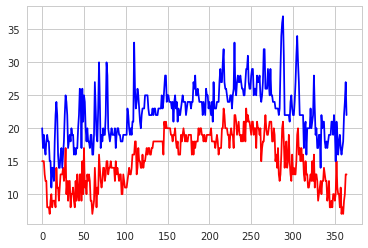

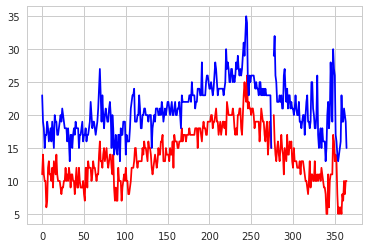

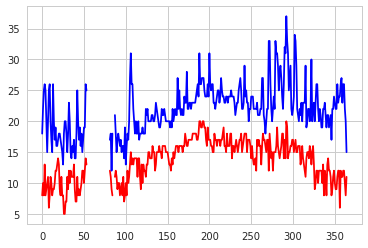

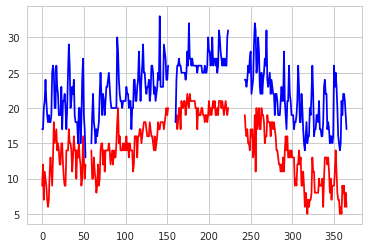

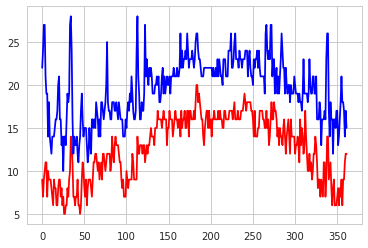

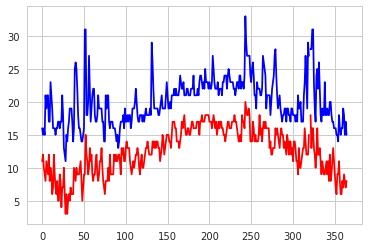

In [18]:
for x in range(1997, 2003):
    sns.set(style='whitegrid')
    plt.figure(figsize=(20,6))
    
    fig, ax = plt.subplots()
    ax.plot(min_max_temp_df[min_max_temp_df['year']==x]['mintempm'].values, 'r')
    ax.plot(min_max_temp_df[min_max_temp_df['year']==x]['maxtempm'].values, 'b')
    #plt.xticks(, size='small')

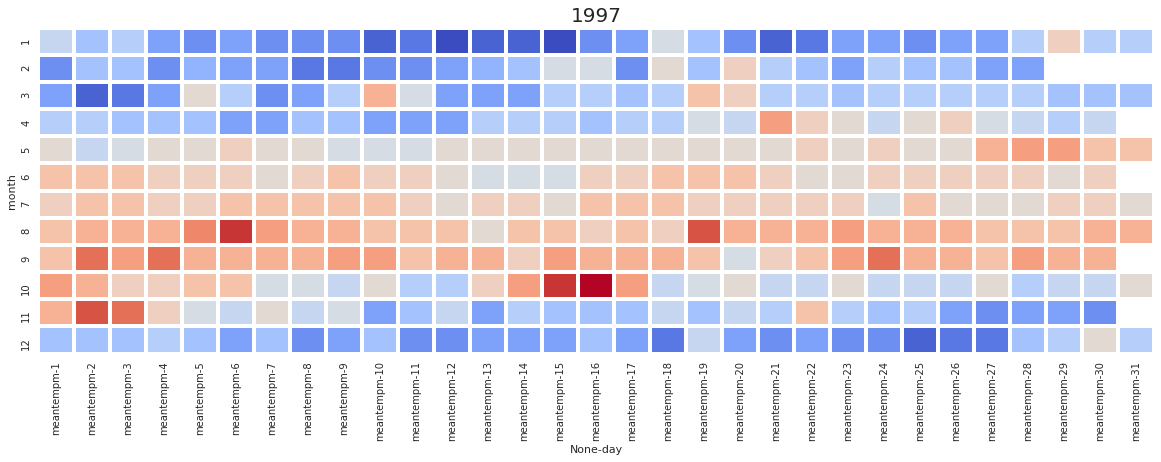

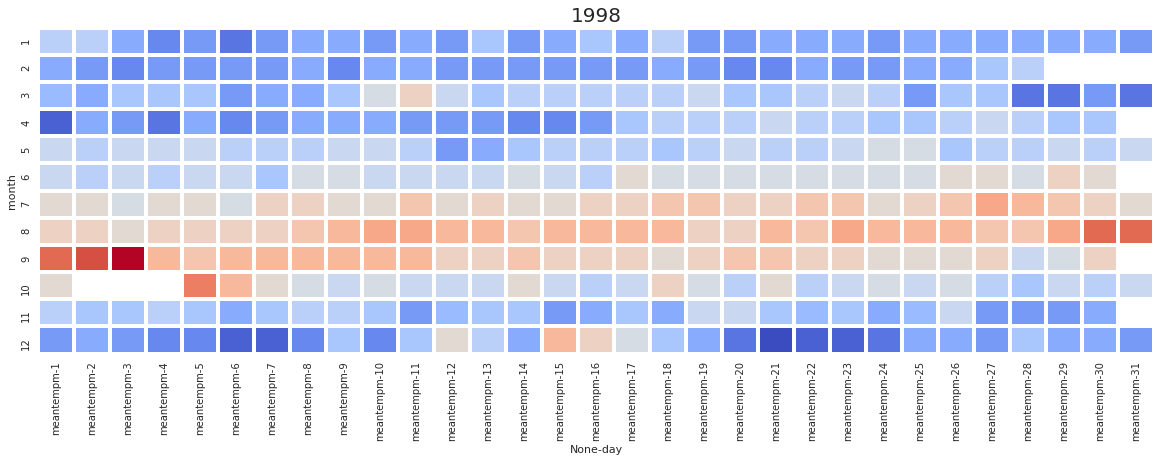

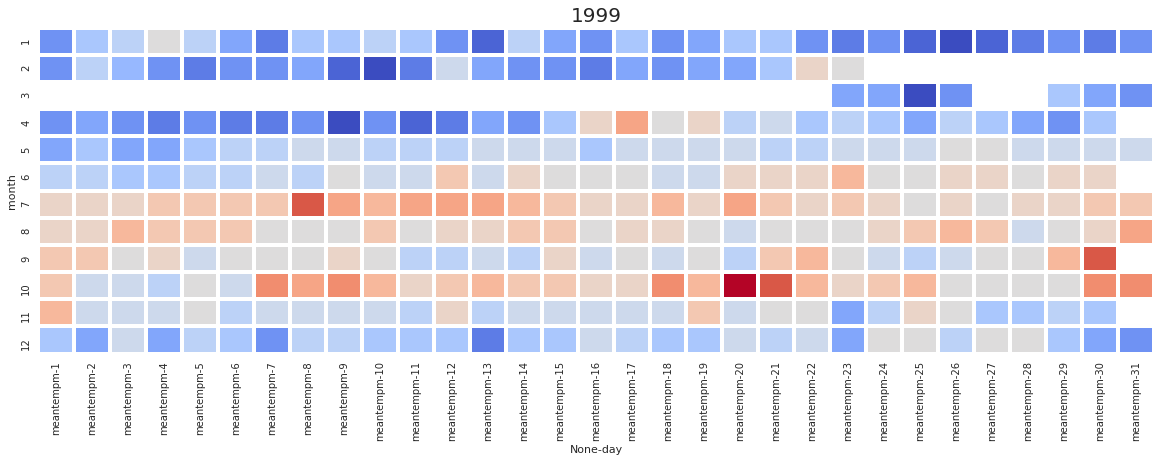

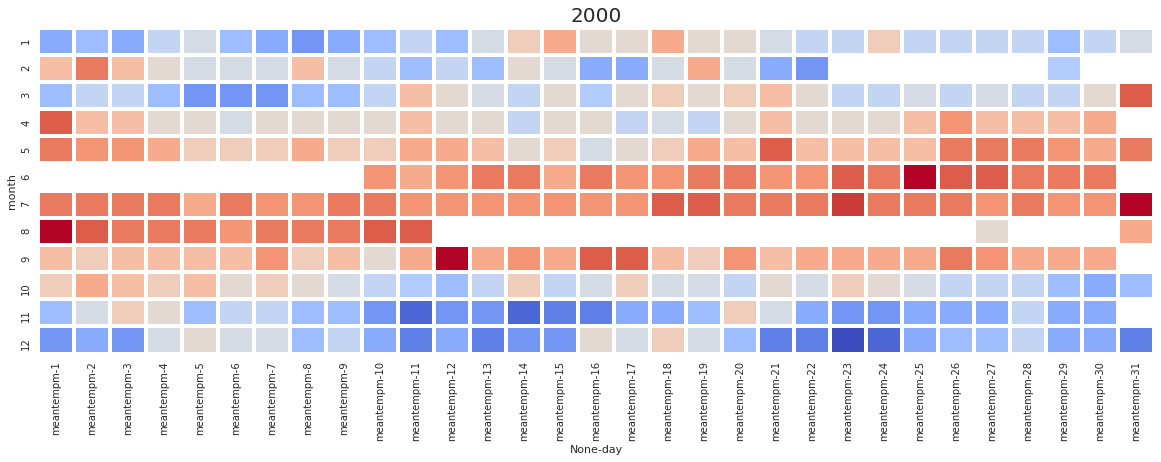

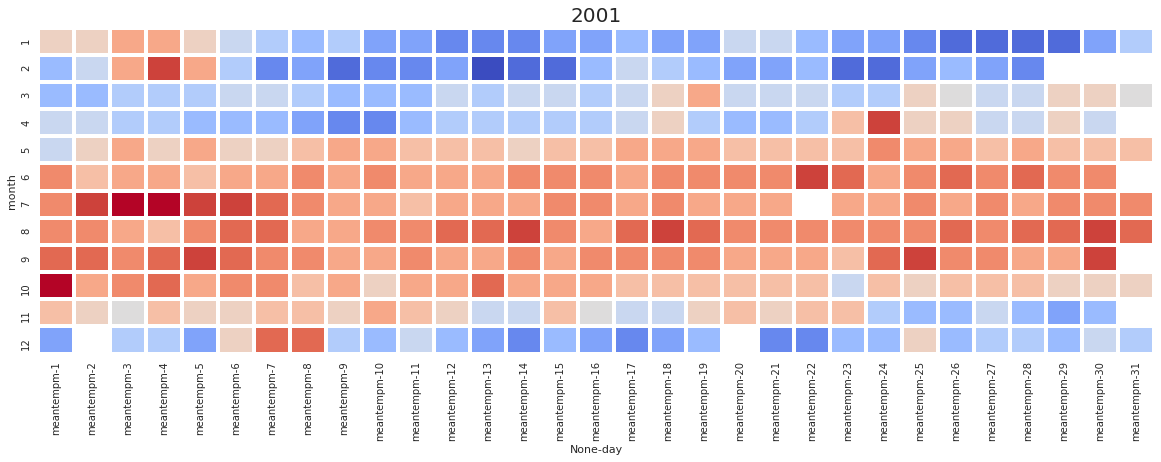

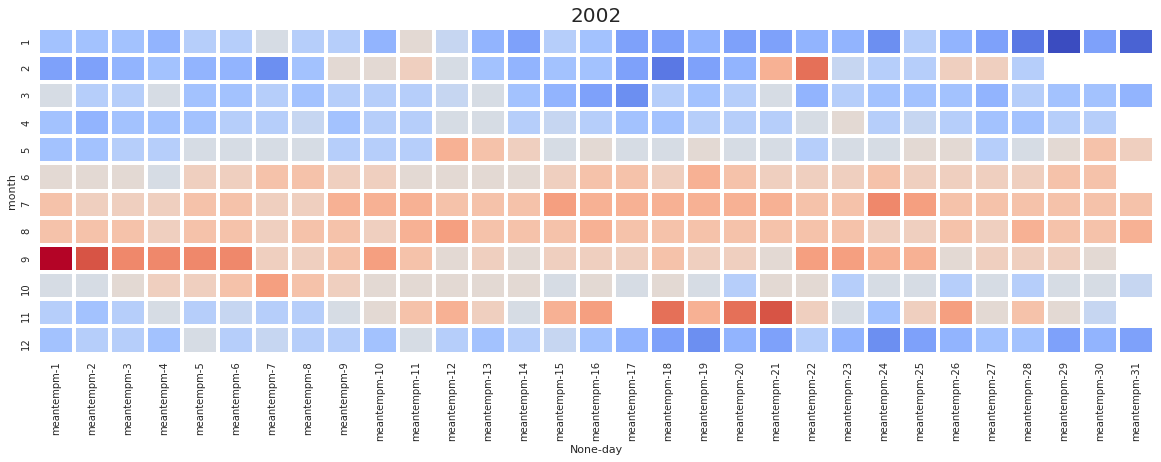

In [19]:
for x in range(1997,2003):
    sns.set(style='whitegrid')
    plt.figure(figsize=(20,6))
    
    sns.heatmap(pt_temp_df.xs(x, level='year', axis=1), linewidth=3, 
                cmap='coolwarm', cbar=False)
  
    plt.title(x, fontsize=20)
    plt.show()

In [20]:
fog_days_df.reset_index(inplace=True)
pt_fog_by_month = fog_days_df.pivot_table(values='fog', index='month', 
                                          columns=['year'], aggfunc='sum', fill_value=0)
pt_fog_by_month = pt_fog_by_month.unstack(level='year')

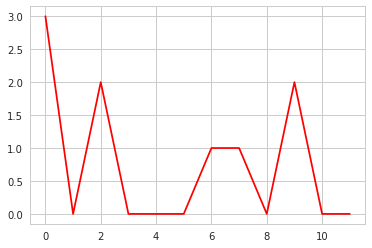

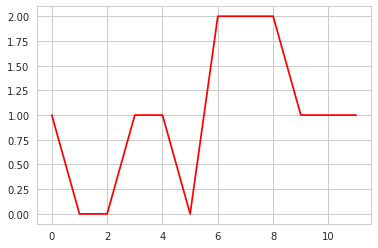

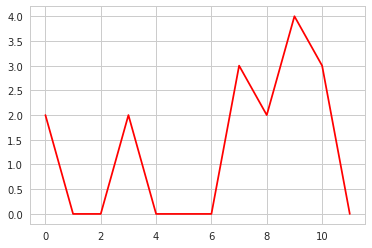

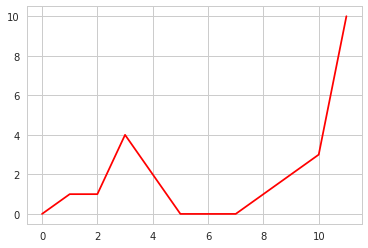

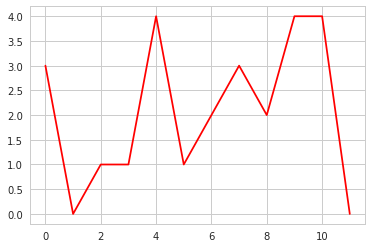

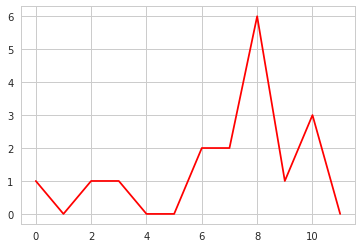

In [21]:
for year in range(1997, 2003):
    sns.set(style='whitegrid')
    plt.figure(figsize=(20,6))
    
    fig, ax = plt.subplots()
    ax.plot(pt_fog_by_month[year].values, 'r')